# Základy vizualizace

Jeden obrázek (či graf) někdy dokáže říci více než tisíc slov. U (explorativní) datové analýzy to platí dvojnásob. A jako umí být manipulativní článek o tisíci slovech, o to manipulativnější umí být "vhodně" připravený graf.

V této lekci si ukážeme, jak z dat, která už umíš načíst a se kterými provádíš mnohé aritmetické operace, vykreslíš některé základní typy grafů: sloupcový, spojnicový a bodový.

## Rozmanitý svět vizualizačních knihoven v Pythonu

Zatímco ohledně knihovny pro běžné zpracování tabulkových dat panuje shoda a při zkoumání malých až středně velkých dat nepříliš exotického typu obvykle saháme po `pandas`, knihoven pro vizualizaci dat existuje nepřeberné množství. Každá má svoje výhody i nevýhody. My si v rámci kurzu představíme tyto tři a budeme se soustředit především na to, jak je použít společně s pandas:

- `matplotlib` - Toto je asi nejrozšířenější a v mnoha ohledech nejflexibilnější knihovna. Představuje výchozí volbu, pokud potřebuješ dobře vyhlížející statické grafy, které budou fungovat skoro všude. Značná flexibilita je vyvážena někdy ne zcela intuitivními jmény funkcí a argumentů. Pandas ji využívá interně (proto se s ní nemusíš seznámit tak detailně). Viz https://matplotlib.org/.

- `seaborn` - Cílem této knihovny je pomoci zejména se statistickými grafy. Staví na matplotlibu, ale překrývá ho "lidskou" tváří. My s ním budeme pracovat při vizualizaci složitějších vztahů mezi více proměnnými. Viz https://seaborn.pydata.org/.

- `plotly` (především její podmnožina `plotly.express`) - Po této knihovně sáhneš, budeš-li chtít do své vizualizace vložit interaktivitu. Ta se samozřejmě obtížně tiskne na papír, ale zejména při práci v Jupyter notebooku umožní vše zkoumat výrazně rychleji. Viz https://plot.ly/python/.

💡 Pro zájemce o bližší vysvětlení doporučujeme podívat se na (již poněkud starší) video od Jakea  Vanderplase: Python Visualizations' Landscape (https://www.youtube.com/watch?v=FytuB8nFHPQ), které shrnuje základní vlastnosti jednotlivých knihoven.


In [1]:
%matplotlib inline

# Co to má znamenat!?

Jestli ses dosud tvářil/a, že nevíš o existenci matplotlibu, teď už nemůžeš :-). Tato mysteriózní řádka (ve skutečnosti tzv. IPython magic command) říká, že se všechny grafy automaticky vykreslí přímo do notebooku. To vůbec není samozřejmé a leckdy to ani nechceme - třeba když je chceme ukládat rovnou do souboru nebo si je prohlížet interaktivně mimo notebook.

💡 Více viz https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-matplotlib.


## Příprava - načtení dat

Nejdříve si načteme data se zeměmi světa, ktará jsme použili již v lekci o typech. Přidáme k tomu i tabulku s vývojem některých ukazatelů v čase pro Českou republiku a hned se na ni podíváme.

Opět kód pro stažení...

Případně můžeš manuálně stáhnout tyto soubory:
- https://raw.githubusercontent.com/janpipek/data-pro-pyladies/master/data/countries.csv
- https://raw.githubusercontent.com/janpipek/data-pro-pyladies/master/data/cze.csv

In [2]:
# Nutné importy ze standardní knihovny
import os
from urllib.request import urlretrieve

# Seznam souborů (viz níže)
zdroje = [
    # Země
    "https://raw.githubusercontent.com/janpipek/data-pro-pyladies/master/data/countries.csv",

    # Česká data
    "https://raw.githubusercontent.com/janpipek/data-pro-pyladies/master/data/cze.csv"
]

for zdroj in zdroje:
    # Pouze poslední část cesty adresy datového zdroje je jeho jméno
    jmeno = zdroj.rsplit("/")[-1]
    
    if not os.path.exists(jmeno):        
        print(f"Soubor {jmeno} ještě není stažen, jdeme na to...")
        urlretrieve(url=zdroj, filename=jmeno)
        print(f"Soubor {jmeno} úspěšně stažen.")
    else:
        print(f"Soubor {jmeno} už byl stažen, použijeme místní kopii.")
print("Všechny soubory jsou staženy.")

Soubor countries.csv už byl stažen, použijeme místní kopii.
Soubor cze.csv už byl stažen, použijeme místní kopii.
Všechny soubory jsou staženy.


In [3]:
import pandas as pd

countries = pd.read_csv("countries.csv").set_index("name")
czech = pd.read_csv("cze.csv")
czech.iloc[::5]

,year,population,alcohol_adults,bmi_men,bmi_women,car_deaths_per_100000_people,calories_per_day,infant_mortality,life_expectancy,life_expectancy_female,life_expectancy_male
0,1980,10260000.0,NaN,26.31,26.80,NaN,NaN,17.0,70.60,74.289,67.153
5,1985,10300000.0,NaN,26.54,26.77,NaN,NaN,15.1,71.13,74.716,67.446
10,1990,10300000.0,NaN,26.77,26.66,NaN,NaN,12.7,71.82,75.619,68.208
15,1995,10320000.0,NaN,26.98,26.45,7.837,3209.0,8.8,73.34,76.923,69.731
20,2000,10240000.0,NaN,27.28,26.45,6.600,3079.0,5.6,74.99,78.231,71.500
25,2005,10220000.0,16.45,27.63,26.48,6.123,3318.0,4.4,76.19,79.442,73.013
30,2010,10490000.0,NaN,NaN,NaN,NaN,3276.0,3.4,77.47,80.672,74.511


## Sloupcový graf (bar plot)

Úplně nejjednodušší graf, který můžeš vytvořit, je **sloupcový**. Vedle sebe postupně zobrazíš sloupečky vysoké podle vlastnosti, která tě zajímá. Ukazuje hodnoty jedné proměnné, aniž by je jakýmkoliv způsobem statisticky zpracovával nebo porovnával s proměnnou jinou.

V `pandas` se k funkcím pro kreslení grafů přistupuje pomocí tzv. **accessoru** `.plot`. To je hybridní objekt, který lze volat jako metodu (`Series.plot()` - použije výchozí typ grafu), anebo lze pomocí další tečky odkazovat na jeho vlastní metody, které kreslí různé typy grafů. Z pedagogických důvodů chceme začít od sloupcového grafu, který výchozí není, a tak voláme [`Series.plot.bar()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.bar.html).

<AxesSubplot:xlabel='name'>

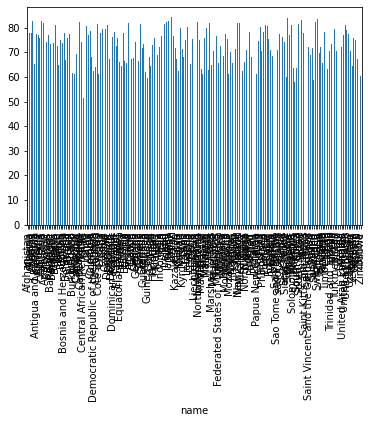

In [4]:
countries["life_expectancy"].plot.bar()

Uf, to nevypadá úplně nejpřehledněji. Zkusme totéž, jen pro země Evropské Unie. Filtrování v `query` očekává řadu logických hodnot, tou je i samotný sloupec `"is_eu"`:

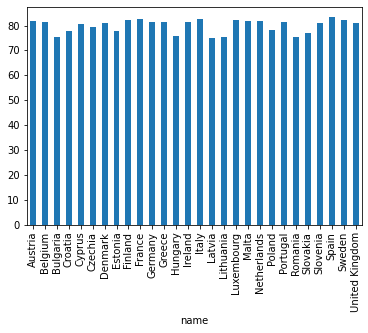

In [5]:
eu_countries = countries.query("is_eu")     # nebo countries[countries["is_eu"]]
x = eu_countries["life_expectancy"].plot.bar()

💡 Grafy se nám zobrazují přímo v notebooku, ale kromě nich dostáváme zpět ještě jakýsi objekt podivné třídy `matplotlib.axes._subplots.AxesSubplot` (jak název napovídá, je součástí knihovny `matplotlib`). Ten reprezentuje obdélník, do kterého se graf kreslí, společně s popisky os a dalšími prvky. S pomocí metod tohoto objektu pak lze grafickou podobu dále ladit, my se tomu ale protentokrát vyhneme, protože většinu důležitých věcí můžeme specifikovat pomocí argumentů příslušné vykreslovací metody, a netrpělivé odkážeme na Bonus č.1.

💡 Pokud chceš schovat výpis hodnoty na posledním řádku nějaké buňky notebooku (u grafů je to typické), můžeš na její konec umístit středník.

Dožívají se lidé více ve Spojeném Království nebo v Německu? To se neporovnává úplně snadno. Co kdybychom hodnoty seřadili a teprve pak zobrazili?

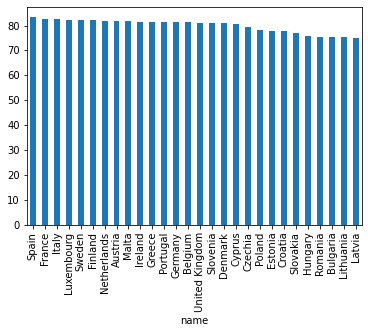

In [6]:
eu_countries["life_expectancy"].sort_values(ascending=False).plot.bar();

Názvy zemí se nečtou moc pohodlně. Co takhle to obrátit? Můžeme zkusit horizontální sloupcový graf, `.plot.barh`:

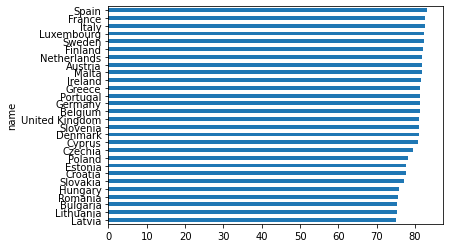

In [7]:
eu_countries["life_expectancy"].sort_values().plot.barh();

Funkce pro kreslení grafů nabízejí spoustu parametrů, které nejsou úplně dobře zdokumentované a jsou dost úzce svázány s tím, jak funguje knihovna `matplotlib`. Budeme si je postupně ukazovat, když nám přijdou vhod. Náš graf by se nám hodilo trošku zvětšit na výšku. Také se hodnoty od sebe příliš neliší a nastavení vlastního rozsahu na ose x by pomohlo rozdíly zvýraznit. Plus si přidáme trošku formátování.

- `figsize` specifikuje velikost grafu jako dvojici (tuple) velikosti v palcích v pořadí (šířka, výška). Pro volbu ideální hodnoty si prostě v notebooku zaexperimentuj.
- `xlim` specifikuje rozsah hodnot na ose x v podobně dvojice (minimum, maximum)
- `color` specifikuje barvu výplně: může jít o název či o hexadecimální RGB zápis
- `edgecolor` říká, jakou barvou mají být sloupce ohraničeny
- `title` nastavuje titulek celého grafu

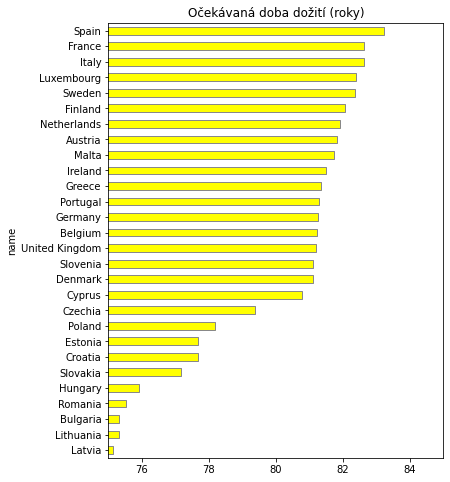

In [8]:
eu_countries["life_expectancy"].sort_values().plot.barh(
    figsize=(6, 8),
    xlim=(75, 85),
    color="yellow",
    edgecolor="#888888",   # střední šeď
    title="Očekávaná doba dožití (roky)"
);

💡 Začínat sloupcové (ale i mnohé další) grafy jinde než u nuly ti pomůže všimnout si i nepatrných rozdílů. V explorativní fázi je to určitě dobrý nápad. Ovšem při prezentaci výsledků mohou zvýrazněné rozdíly mást publikum a budit dojem, že nějaký efekt je výrazně silnější než ve skutečnosti. Manipulační efekt je tím silnější, čím méně intuitivní jsou prezentovaná data. V tomto případě by asi málokdo uvěřil, že ve Španělsku žijí lidé šedesátkrát déle než v Lotyšsku, protože to neodpovídá běžnému očekávání, ale i tak na první pohled situace vypadá velice dramaticky (necháváme ti na posouzení, jestli rozdíl mezi 75 a 83, neboli cca 10 %, je obrovský či nikoliv). Novináři takto matou poměrně často - ať už úmyslně nebo omylem.

V grafu můžeme snadno zobrazit více veličin najednou, pokud jej nevytváříme skrze `Series`, ale `DataFrame`. Stačí místo jednoho sloupce dodat sloupců více (například výběrem z `DataFrame`) a pro každý řádek se nám zobrazí více sloupečků pod sebou.

V našem případě se podíváme na to, kolika let se dožívají muži a ženy. Zvolíme genderově stereotypní barvy (ono je to někdy intuitivnější), ale ty si je samozřejmě můžeš upravit podle libosti.

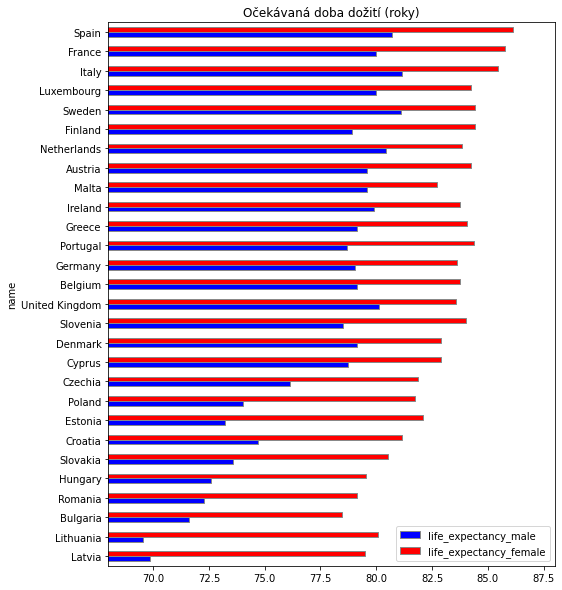

In [9]:
eu_countries.sort_values("life_expectancy")[["life_expectancy_male", "life_expectancy_female"]].plot.barh(
    figsize=(8, 10),
    xlim=(68, 88),               # rozsah osy
    color=["blue", "red"],       # dvě různé barvy pro dva sloupce
    edgecolor="#888888",         # střední šeď
    title="Očekávaná doba dožití (roky)"
);

**Úkol:** Zkus si nakreslit sloupcový graf některé z dalších charakteristik zemí (ať už evropských nebo filtrováním přes nějaký region) a zamysli se nad tím, jakou výpovědní hodnotu takový graf má.

## Bodový graf (scatter plot)

Bodový graf je nejjednodušším způsobem, jak porovnat dvě různé veličiny. V soustavě souřadnic, jak se používá v matematice, každému řádku odpovídá jeden bod. Hodnoty dvou sloupců pak kódují souřadnice `x` a `y`. To se odráží i ve způsobu, jak bodový graf v `pandas` vytváříme.

Zavoláme metodu [`plot.scatter`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html) naší tabulky a dodáme jí coby argumenty `x` a `y` jména sloupců, která se pro souřadnice mají použít:

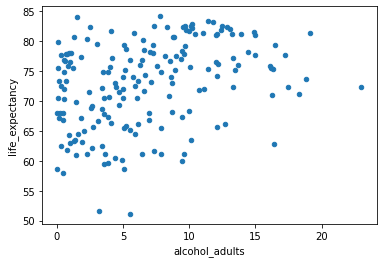

In [10]:
# Souvislost mezi pitím a střední dobou života
countries.plot.scatter(
    x="alcohol_adults",
    y="life_expectancy",
);

💡 O kauzalitách, korelacích a souvislostech mezi veličinami si budeme povídat jindy, ale taky se nemůžeš ubránit dojmu, že čím více se někde pije, tím déle se tam žije?

I bez matematické rigoróznosti poznáme, kde bude zakopaný pes. Zkusme si obarvit jednotlivé regiony světa různými (stereotypními?) barvami. Naučíme se u toho šikovnou funkci `map`, která hodnoty v `Series` nahradí podle slovníku z->do (a vrátí novou instanci `Series`). Sloupec `world_4region` obsahuje přesně 4 různé oblasti ("kontinenty"), tak nám bude stačit velice jednoduchý slovník.

Ukážeme si několik dalších argumentů:
- `s` vyjadřuje velikost (resp. přibližně plochu) symbolu v bodech (může být jedna hodnota nebo sloupec/pole hodnot)
- `marker` značí tvar symbolu, většinou pomocí jednoho písmene, viz [seznam možností](https://matplotlib.org/3.1.1/api/markers_api.html)
- `alpha` vyjadřuje neprůhlednost symbolu (0 = naprosto průhledný a není vidět, 1 = neprůhledný, intenzivní, schovává vše "za sebou"). Hodí se, když máme velké množství symbolů v grafu a chceme jim dovolit, aby se překrývaly.

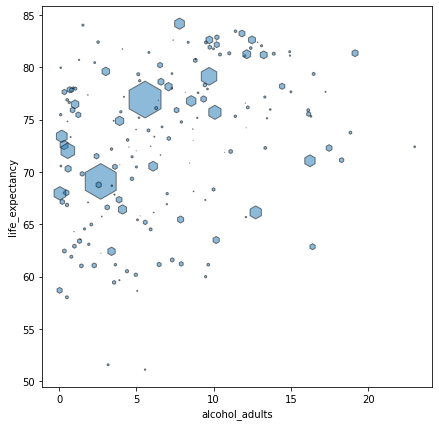

In [11]:
# Souvislost mezi pitím a střední dobou života
countries.plot.scatter(
    figsize=(7, 7),
    x="alcohol_adults",
    y="life_expectancy",
    marker="h",        # Tvar symbolu: šestiúhelník - (h)exagon   
    s=countries["population"] / 1e6,   # Velikost symbolu (na druhou) podle populace
    edgecolor="black", # Barva okraje
    alpha=0.5          # Poloprůhledné symboly
);

Některé parametry nemusí mít společnou hodnotu pro všechny řádky. Lze místo nich použít seznam nebo `Series` o správné délce, což si nyní ukážeme na barvě, kterou přizpůsobíme regionu (použijeme metodu [`map`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html)):

In [12]:
barvy_regionu = {
    "europe": "blue",
    "asia": "yellow",
    "africa": "black",
    "americas": "red"
}
barva = countries["world_4region"].map(barvy_regionu)  
barva

name
Afghanistan    yellow
Albania          blue
Algeria         black
Andorra          blue
Angola          black
                ...  
Venezuela         red
Vietnam        yellow
Yemen          yellow
Zambia          black
Zimbabwe        black
Name: world_4region, Length: 193, dtype: object

Když teď použijeme `barva` v argumentu `color`, aplikuje se na každý bod specifická hodnota.

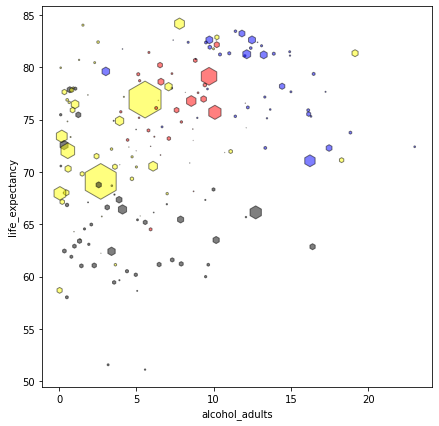

In [13]:
countries.plot.scatter(
    figsize=(7, 7),
    x="alcohol_adults",
    y="life_expectancy",
    marker="h",        # Tvar symbolu: šestiúhelník - (h)exagon
    color=barva,       # Bohužel nejde použít jen jméno sloupce, musíme dát celé "pole" hodnot      
    s=countries["population"] / 1e6,   # Velikost symbolu (na druhou) podle populace
    edgecolor="black", # Barva okraje
    alpha=0.5          # Poloprůhledné symboly
);

A tak to vlastně vypadá, že v Asii se obecně pije málo, v Americe tak středně, v Africe se lidé dožívají menšího věku, ale na první pohled v těchto skupinách zemí nevidíme žádný trend. Jediný kontinent, který se vymyká, je Evropa, kde se jak hodně pije, tak dlouho žije, ale obojí je nejspíš důsledkem moderního způsobu života. No a při bližším pohledu se naopak zdá, že v rámci Evropy větší pití znamená kratší život. 

Často se stane, že jsou hodnoty obtížně souměřitelné. Například co do rozlohy či počtu obyvatelstva se na světě vyskytují země miniaturní a naopak gigantické. Rozdíly jsou řádové:

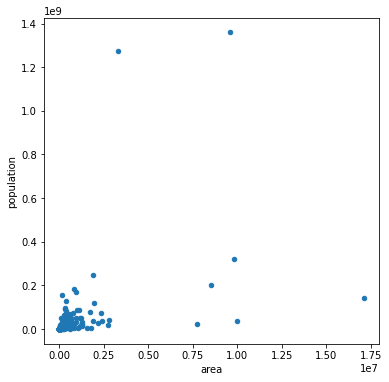

In [14]:
countries.plot.scatter(
    x="area",
    y="population",
    figsize=(6,6)
);

No nic moc - odděleně vidíme cca 7 až 20 bodů a zbytek splývá v jednu velikou "kaňku". V takovém případě se hodí opustit běžné **lineární měřítko**. Místo něj použijeme **logaritmické měřítko**. K tomu slouží argumenty `logx` a `logy` (podle příslušné osy).

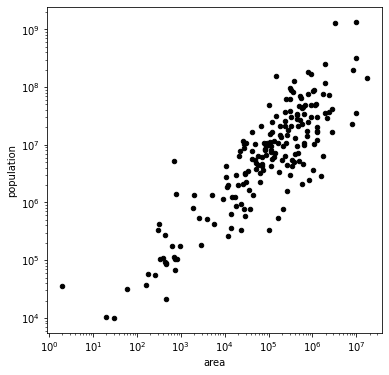

In [15]:
ax = countries.plot.scatter(
    x="area",
    y="population",
    color="black",
    figsize=(6, 6),
    logx=True,
    logy=True,
);

**Úkol:** Vyzkoušej si zobrazení některých dalších dvojic veličin. Které z nich ukazují zajímavé výsledky?

## Spojnicový graf (line plot)

Tento druh grafu má smysl zejména tehdy, pokud se nějaká proměnná vyvíjí spojitě v závislosti na proměnné jiné. Časové řady jsou pro to skvělým příkladem (ať už pro vztah mezi časem a veličinou, anebo dvěma veličinami, které se obě vyvíjí ve stejném čase).

Spojnicový graf vytvoříš pomocí funkce [`plot.line`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.line.html). Shodou okolností je to také výchozí typ grafů pro `pandas`, a tak vlastně postačí `plot` zavolat jako metodu. Parametry má podobné jako `scatter` (bodový graf).

Pojďme se například podívat na vývoj očekávané doby života v Česku, jak se vyvíjela s časem od začátku 80. let:

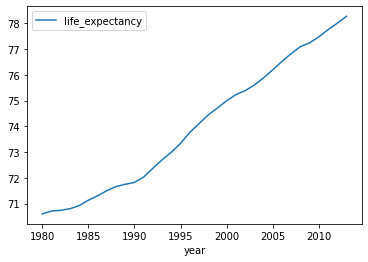

In [16]:
czech.plot.line(x="year", y="life_expectancy");

Samozřejmě můžeme opět vykreslit více sloupců.

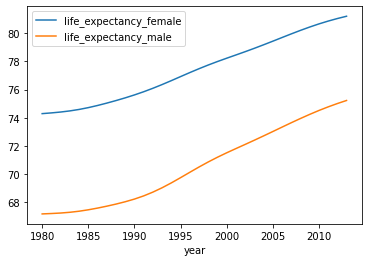

In [17]:
czech.plot(x="year", y=["life_expectancy_female", "life_expectancy_male"]);

Pro čárové grafy existuje několik zajímavých argumentů:

- `lw` udává tloušťku čáry v bodech
- `style` je styl čáry: "-" je plná, ":" tečkovaná, "--" přerušovaná, "-." čerchovaná
- `markersize` je velikost symbolu, který může volitelně čáru doprovázet

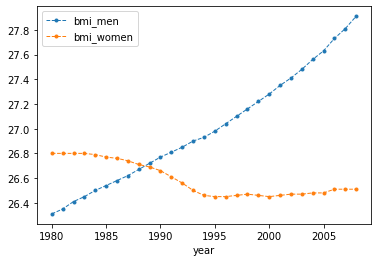

In [18]:
czech.plot.line(
    x="year",
    y=["bmi_men", "bmi_women"],
    lw=1,
    style="--",
    marker="o",       # Přidáme kulaté body pro hodnoty z tabulky
    markersize=3);

Čárový graf nedává smysl v případě, že na sobě dvě proměnné nejsou přímo závislé nebo se nevyvíjí společně. Zkusme například nakreslit čárový graf vztahu mezi pitím alkoholu a dobou života v jednotlivých zemích:

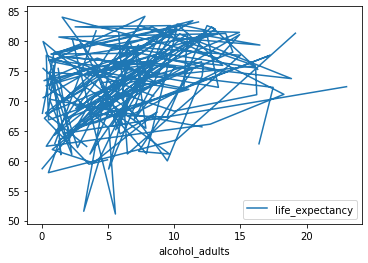

In [19]:
countries.plot.line(x="alcohol_adults", y="life_expectancy");

Dostali jsme čáranici, ze které nelze vyčíst vůbec nic. Můžeš namítnout, že hodnoty nejsou seřazené, a že by situace byla lepší, kdybychom třeba země seřadili podle spotřeby alkoholu. No pojďme to zkusit:

,alcohol_adults,life_expectancy
name,,
Afghanistan,0.03,58.69
Pakistan,0.05,67.96
Kuwait,0.10,79.96
Libya,0.10,75.47
Mauritania,0.11,70.57
...,...,...
Marshall Islands,NaN,65.00
Monaco,NaN,NaN
Montenegro,NaN,77.35


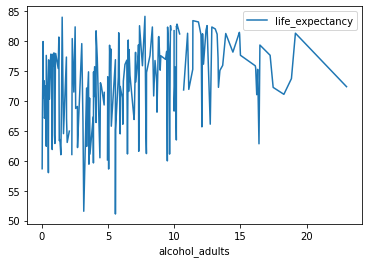

In [20]:
sorted_countries = countries.sort_values("alcohol_adults")
sorted_countries.plot.line(x="alcohol_adults", y="life_expectancy")
sorted_countries[["alcohol_adults", "life_expectancy"]]

Dává to smysl? Čára sice nelítá napříč celým grafem, "jen" zdola nahoru, ale i tak je to nesmysl, protože žádné "přirozené" uspořádání zemí neexistuje a nemá smysl se ho snažit lámáním přes koleno sestavit. V tomto případě byl bodový graf mnohem lepší volbou.

**Úkol:** Zkus si nakreslit spojnicový graf časového vývoje některých dalších ukazatelů pro Česko. Co se stane, když zkusíš do jednoho obrázku dostat třeba "life_expectancy_female" a "calories_per_day"?

## Bonus: Jak kreslit pomocí jiných knihoven?

A to je ze základů vizualizace vlastně všechno, další typy grafů si ukážeme jindy.

Pokud ti to ještě nestačilo, ještě si ukážeme, jak by se bodový graf vztahu mezi očekávanou délkou života a množstvím vypitého čistého alkoholu vytvořil ve třech jiných vizualizačních knihovnách. Nebudeme to však již příliš komentovat.

### Bonus 1: "čistý" matplotlib

Protože výchozí kreslení grafů v `pandas` staví na knihovně `matplotlib` a jen jednotlivé funkce obaluje a zpříjemňuje práci se sloupci, budou parametry funkcí povětšinou podobné (hlavní rozdíl je v tom, že neberou názvy sloupců, musíš předat sloupec jako takový).

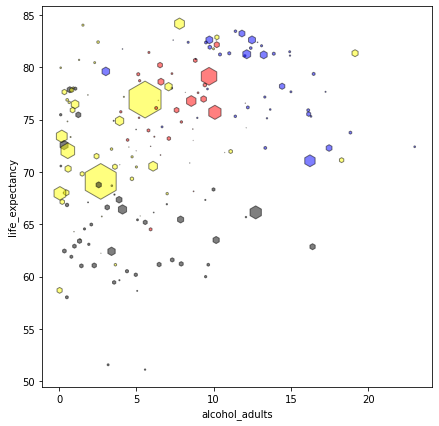

In [21]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(
    countries["alcohol_adults"],
    countries["life_expectancy"],
    s=countries["population"] / 1e6,
    color=countries["world_4region"].map({"europe": "blue", "asia": "yellow", "africa": "black", "americas": "red"}),
    edgecolor="black",
    marker="h",
    alpha=0.5
);

# Popisky os musíme doplnit ručně
ax.set_xlabel("alcohol_adults")
ax.set_ylabel("life_expectancy");

Galerie ukázkových příkladů `matplotlib` je nepřeberná: https://matplotlib.org/3.3.1/gallery/index.html

### Bonus 2: seaborn

Seaborn je vhodný především pro složitější statistické grafy. Ale obsahuje též vlastní funkce, které obalují volání `matplotlib`u.

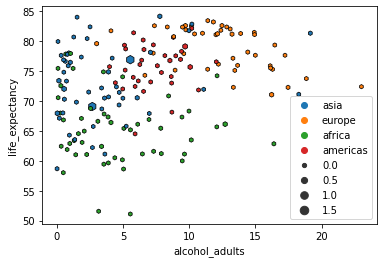

In [22]:
import seaborn as sns

sns.scatterplot(
    data=countries,          # Pracuje s DataFrame
    x="alcohol_adults",
    y="life_expectancy",     # Rozumí názvům sloupců :-)
    # size="population",     # Velikost podle sloupce (nepříliš vhodná)
    # hue="world_4region",   # Umí přiřadit barvičky podle nějaké kategorie
    edgecolor="black",       # Toto se předá matplotlibu (viz předchozí případ)
    marker="h",              # Toto se předá matplotlibu (viz předchozí případ)
    
    #### Obejdeme bug v matplotlib 3.3.1
    size=countries["population"].tolist(),       
    hue=countries["world_4region"].tolist(),
    #### Správně by měly fungovat zakomentované řádky nahoře
);

Mnoho ukázkových vizualizací najdeš na stránkách samotného projektu: https://seaborn.pydata.org/examples/index.html

### Bonus 3: plotly.(express)

`plotly` se vymyká, protože umožňuje přímo do notebooku zobrazit interaktivní grafy, ve kterých jde libovolně zoomovat, navíc při najetí na nějaký bod ukazují užitečné doplňují tooltipy. Od verze 4.0 navíc pomocí velice elegantně designovaných funkcí v integrovaném balíčku `plotly.express`.

In [ ]:
import plotly.express as px

px.scatter(
    countries.reset_index(),    # Vrátíme si index zpátky do tabulky (jako "name")
    x="alcohol_adults",
    y="life_expectancy",
    size="population",
    color="world_4region",
    hover_name="name"           # Použije se při najetí myší jako titulek pomocného balonku
)

A co bys řekl/a na mapu světa se zeměmi vybarvenými podle očekávané délky života?

In [ ]:
px.choropleth(
    countries.reset_index(),  
    locations="iso",
    color="life_expectancy",  
    hover_name="name"
)

Mnoho ukázek, včetně několika se zeměmi světa, najdeš na stránkách projektu: https://plot.ly/python/plotly-express/